#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

#Load the California Housing Dataset




In [ ]:
# Load the dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')  # Median house value in $100,000s
# Display the first few rows of the dataset
X.head(), y.head()


(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: MedHouseVal, dtype: float64)

#Split the Data into Training and Testing Sets



In [ ]:

# Generate synthetic data
X, y, coefficients = make_regression(n_samples=100, n_features=1, noise=10, coef=True, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Get the intercept and coefficients from the model
intercept = linear_model.intercept_
coefficients = linear_model.coef_

print("beta/intercept values are:")
# Display the intercept and coefficients
intercept, coefficients


beta/intercept values are:


(0.09922221422587718, array([44.24418216]))

#Apply Ridge Regression



In [ ]:
# Initialize Ridge regression with a regularization parameter alpha
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")


Ridge Regression
Mean Squared Error: 105.79
R-squared: 0.94


#Apply Lasso Regression



In [ ]:
# Initialize Lasso regression with a regularization parameter alpha
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.2f}")



Lasso Regression
Mean Squared Error: 104.44
R-squared: 0.94


#Compare Coefficients



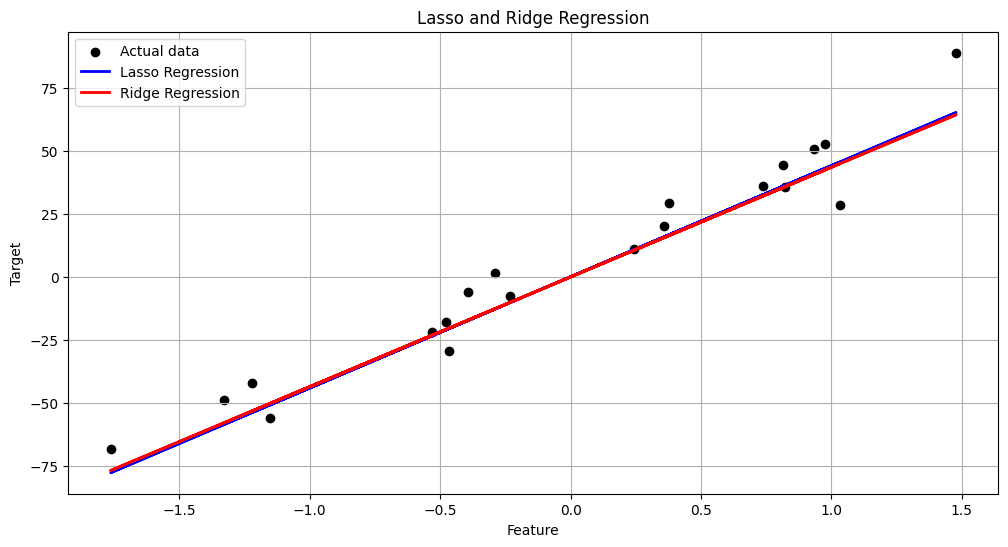

In [ ]:


# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot of actual data points
plt.scatter(X_test, y_test, color='black', label='Actual data')

# Plot Lasso predictions
plt.plot(X_test, y_pred_lasso, color='blue', linewidth=2, label='Lasso Regression')

# Plot Ridge predictions
plt.plot(X_test, y_pred_ridge, color='red', linewidth=2, label='Ridge Regression')

# Add labels and legend
plt.title('Lasso and Ridge Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()


In [ ]:
    # Plotting function
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(title)
    plt.axis('equal')
    plt.grid()
    plt.show()

# Plotting Ridge Predictions
plot_predictions(y_test, ridge_predictions, 'Ridge Regression: Actual vs Predicted')

# Plotting Lasso Predictions
plot_predictions(y_test, lasso_predictions, 'Lasso Regression: Actual vs Predicted')


IndentationError: expected an indented block after function definition on line 2 (<ipython-input-23-625ac458880a>, line 3)

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit Elastic Net model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_net_model.fit(X_train, y_train)

# Make predictions
elastic_net_predictions = elastic_net_model.predict(X_test)

# Calculate Mean Squared Error
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
print(f'Elastic Net Mean Squared Error: {elastic_net_mse}')

# Plotting Elastic Net Predictions
plot_predictions(y_test, elastic_net_predictions, 'Elastic Net Regression: Actual vs Predicted')


Elastic Net Mean Squared Error: 0.6586167547995297


NameError: name 'plot_predictions' is not defined

In [ ]:


# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Coefficients
coeff_linear = linear_model.coef_
coeff_ridge = ridge_model.coef_
coeff_lasso = lasso_model.coef_

# Visualize the coefficients
coeffs_df = pd.DataFrame({
    'Feature': X_sample.columns,
    'Linear': coeff_linear,
    'Ridge': coeff_ridge,
    'Lasso': coeff_lasso
})

# Plot coefficients for comparison
coeffs_df.plot(kind='bar', x='Feature', figsize=(10, 6))
plt.title('Comparison of Coefficients for Linear, Ridge, and Lasso Regression')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Display results
mse_results = {
    "Linear Regression MSE": mse_linear,
    "Ridge Regression MSE": mse_ridge,
    "Lasso Regression MSE": mse_lasso,
}

coeffs_df, mse_results


ValueError: All arrays must be of the same length

In [ ]:
# Print the results of Linear Regression
print("Linear Regression:")
print(f"Intercept: {intercept:.4f}")
for i, coef in enumerate(coefficients):
    print(f"Coefficient for {X_sample.columns[i]}: {coef:.4f}")
print("\n")

# Print the results of Ridge Regression
print("Ridge Regression:")
print(f"Intercept: {intercept_ridge:.4f}")
for i, coef in enumerate(coefficients_ridge):
    print(f"Coefficient for {X_sample.columns[i]}: {coef:.4f}")
print("\n")

# Print the results of Lasso Regression
print("Lasso Regression:")
print(f"Intercept: {intercept_lasso:.4f}")
for i, coef in enumerate(coefficients_lasso):
    print(f"Coefficient for {X_sample.columns[i]}: {coef:.4f}")


Linear Regression:
Intercept: 0.0267
Coefficient for MedInc: 0.4455
Coefficient for HouseAge: 0.0169
Coefficient for AveRooms: -0.0284
Coefficient for AveOccup: -0.0041


Ridge Regression:
Intercept: 0.0267
Coefficient for MedInc: 0.4455
Coefficient for HouseAge: 0.0169
Coefficient for AveRooms: -0.0284
Coefficient for AveOccup: -0.0041


Lasso Regression:
Intercept: 1.3261
Coefficient for MedInc: 0.1484
Coefficient for HouseAge: 0.0059
Coefficient for AveRooms: 0.0000
Coefficient for AveOccup: -0.0000


In [ ]:
# Step 1: Make predictions on the test set for each model
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Step 2: Print the predicted values for each model
print("Predicted values for Linear Regression:")
print(y_pred_linear[:10])  # Display first 10 predictions

print("\nPredicted values for Ridge Regression:")
print(y_pred_ridge[:10])  # Display first 10 predictions

print("\nPredicted values for Lasso Regression:")
print(y_pred_lasso[:10])  # Display first 10 predictions


Predicted values for Linear Regression:
[1.06317056 1.50730032 2.33746171 2.6807683  2.09460796 2.16894462
 2.7108065  2.1567535  2.11531728 4.19477207]

Predicted values for Ridge Regression:
[1.06318664 1.50731076 2.33745934 2.68075524 2.09460894 2.16893845
 2.71079752 2.15675314 2.11530765 4.19473796]

Predicted values for Lasso Regression:
[1.72418541 1.88002973 2.15160259 2.27838579 2.08090116 2.09690644
 2.29438765 2.09961257 2.06252481 2.79730317]


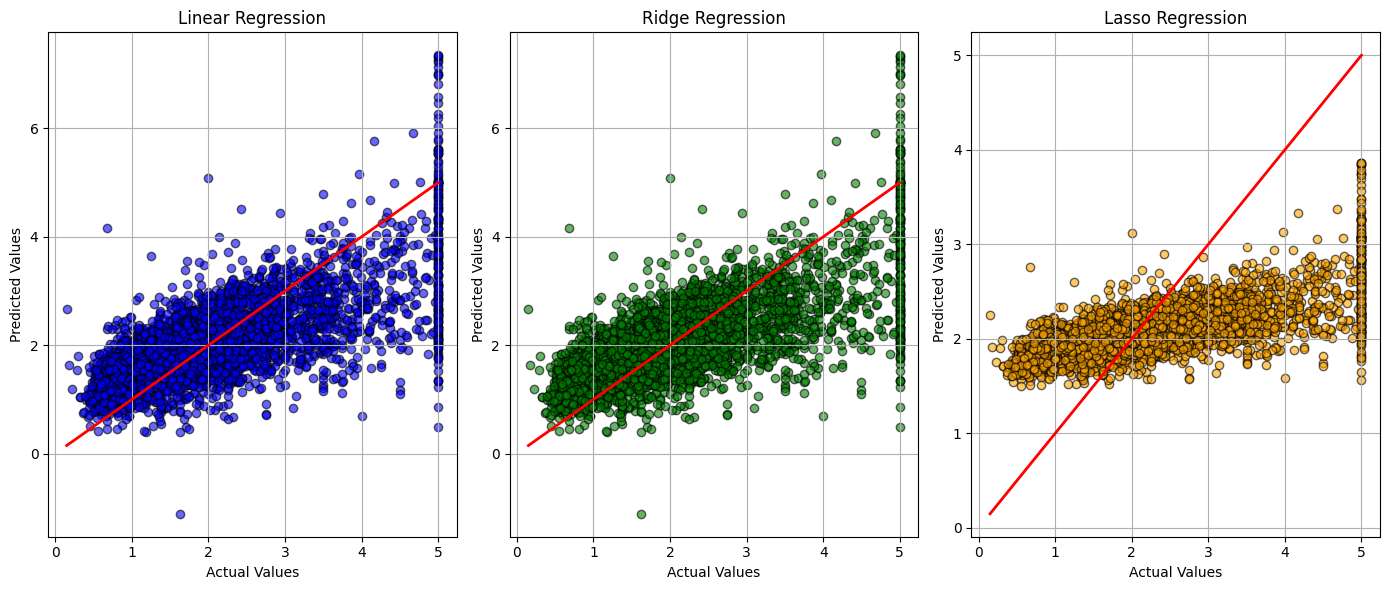

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Step 1: Plot predicted vs actual values for all models
plt.figure(figsize=(14, 6))

# Plot for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Plot for Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, color='green', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Plot for Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, color='orange', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


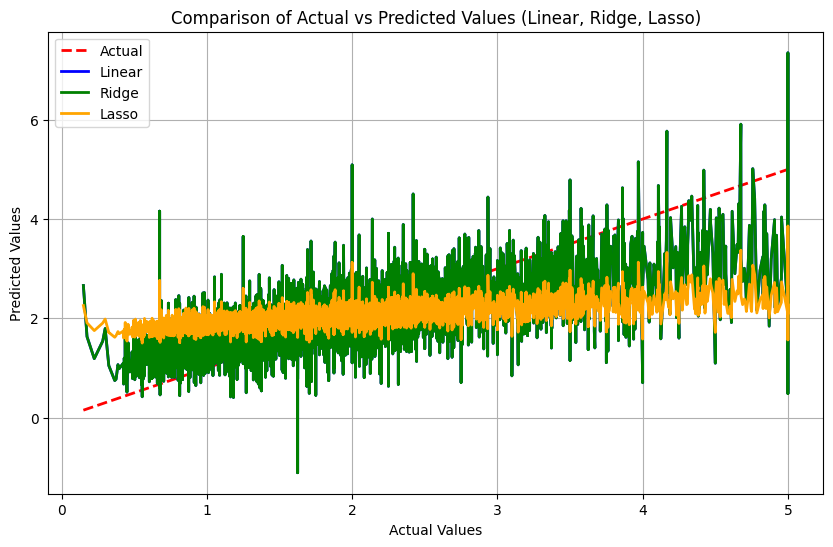

In [ ]:
# Step 2: Plot regression lines for comparison (including actual values)
plt.figure(figsize=(10, 6))

# Sort the test values and predictions for better line visualization
sorted_idx = np.argsort(y_test)

# Plot Actual Values
plt.plot(y_test[sorted_idx], y_test[sorted_idx], label='Actual', color='red', linestyle='--', linewidth=2)

# Plot Linear Regression Line
plt.plot(y_test[sorted_idx], y_pred_linear[sorted_idx], label='Linear', color='blue', linewidth=2)

# Plot Ridge Regression Line
plt.plot(y_test[sorted_idx], y_pred_ridge[sorted_idx], label='Ridge', color='green', linewidth=2)

# Plot Lasso Regression Line
plt.plot(y_test[sorted_idx], y_pred_lasso[sorted_idx], label='Lasso', color='orange', linewidth=2)

# Adding labels and title
plt.title('Comparison of Actual vs Predicted Values (Linear, Ridge, Lasso)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the regression comparison plot
plt.show()
